In [1]:
# 1.1) Import packages
import numpy as np
from importlib import reload
from brian2 import*
import pickle
import NeuroTools as nt
from NeuroTools import signals, analysis
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy.io as sio
import seaborn as sns
import matplotlib.patches as mpatches
#import plotpy.express as px
%matplotlib notebook

# Import and reload my helpers module for iterative development
import helpers
reload(helpers)
from helpers.Function_DataAnalysis import *
#from helpers.bin import *

# default dict. to assign values
from collections import defaultdict

# 1.2) Import data of simulations
nameInput = 'DCN_IO_plast_test'
#name_simparam = nameInput + '_SimParams.pickle'

name_VoltCell_STDP = nameInput + '_VoltageCell_Plasticity.pickle'
#name_VoltCell_noSTDP = nameInput + '_VoltageCell_NoPlasticity.pickle'

#name_SpikeT_noSTDP = nameInput + '_SpikeTimes_NoPlasticity.pickle'
name_SpikeT_STDP = nameInput + '_SpikeTimes_Plasticity.pickle'

#name_PV = nameInput + '_PlasticityVariables.pickle'
#name_Input_noSTDP = nameInput + 'AfterSim_NoPlasticity.pickle'
name_Input_STDP = nameInput + 'AfterSim_Plasticity.pickle'

name_Pop = nameInput + '_Population_rate.pickle'
#name_PV = nameInput + '_PlasticityVariables.pickle'
#with open(name_PV, 'rb') as par:
#    PV = pickle.load(par)
#with open(name_SpikeT_noSTDP, 'rb') as st:
#    SpikeTimes_noSTDP = pickle.load(st)
#with open(name_VoltCell_noSTDP, 'rb') as vc:
#    VoltCell_noSTDP = pickle.load(vc)
#with open(name_Input_noSTDP, 'rb') as inp:
#    Input_noSTDP = pickle.load(inp)

with open(name_SpikeT_STDP, 'rb') as stm:
    SpikeTimes_STDP = pickle.load(stm)
with open(name_VoltCell_STDP, 'rb') as vcm:
    VoltCell_STDP = pickle.load(vcm)
with open(name_Input_STDP, 'rb') as inpm:
    Input_STDP = pickle.load(inpm)
with open(name_Pop, 'rb') as mje:
    Pop_Rate = pickle.load(mje)

In [2]:
# 2) Split Data - before/after adaptation    

# before = start_t:t_beforeAdaptation
# after = t_beforeAdaptaion:end
# indicated by BA (BeforeAdaptation) and AA (AfterAdaptation) accordingly

start = 0 # remove first second of data due to transient
t_beforeAdaptation = int(len(Input_STDP['I'][1])/2)

nrInputs=Input_STDP['I'].shape[0] # number of inputs
nrPC = VoltCell_STDP['PC_coupled'].shape[0]
nrDCN = VoltCell_STDP['DCN_coupled'].shape[0]
nrIO = VoltCell_STDP['IOsoma_coupled'].shape[0]
nrDummy = nrPC*nrInputs
lengthSim =VoltCell_STDP['PC_coupled'].shape[1]

#### NOTE: What to do with 'regular' Input?

for k in range(0,nrIO):
    spikeio_c, _ = find_peaks(VoltCell_STDP['IOsoma_coupled'][k], height=0.0, distance = 10) 
    spikeio_uc, _ = find_peaks(VoltCell_STDP['IOsoma_uncoupled'][k], height=0.0, distance = 10) 
    spikeio_c = spikeio_c/1000
    spikeio_uc = spikeio_uc/1000
    SpikeTimes_STDP['IO_uncoupled'][k]=spikeio_uc
    SpikeTimes_STDP['IO_coupled'][k]=spikeio_c

<IPython.core.display.Javascript object>


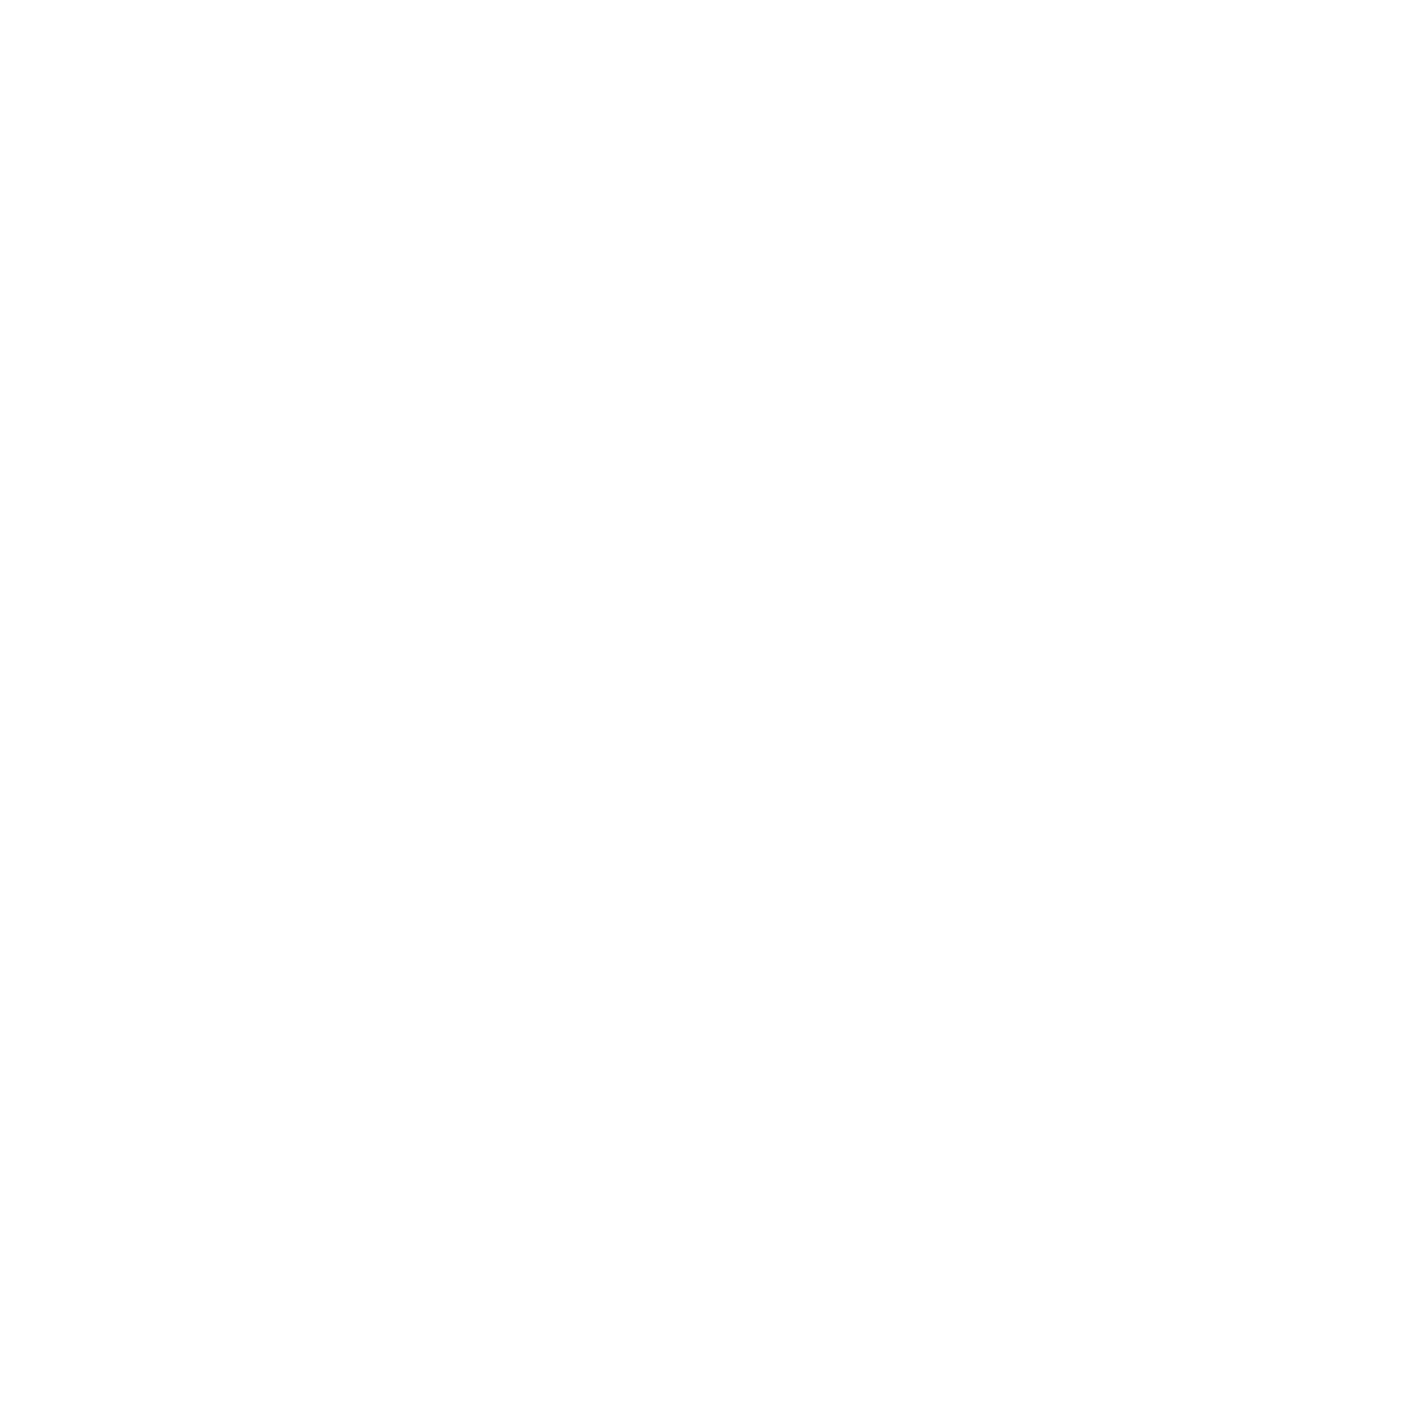

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
 [py.warnings]


In [3]:
# UnCoupled Figure
%matplotlib notebook
t=Pop_Rate['t']/1e3 # time 
# figure 1 : Uncoupled

fig, axs = plt.subplots(6, 1,figsize=(15,15))

# subplot 1: population frequency PC
ax1= plt.subplot(6,1,1)
plt.title('uncoupled')
plt.plot(t,Pop_Rate['PC_uncoupled'])
plt.ylabel('PC population f')
# subplot 2: population frequency DCN
ax2 = plt.subplot(612, sharex=ax1)
plt.plot(t,Pop_Rate['DCN_uncoupled'])
plt.ylabel('DCN population f')

# subplot 3: population frequency IO
ax3 = plt.subplot(613,sharex = ax1)
plt.plot(t,Pop_Rate['IO_uncoupled'])
plt.ylabel('IO population f')

# Raster plot PC
for i in range(0,nrPC):
    ax3 = plt.subplot(6,1,4, sharex=ax1)
    ax3.set_ylabel('PC Index [-]')
    neu = SpikeTimes_STDP['PC_uncoupled'][i]
    lensim = len(neu)
    yPC=np.ones((lensim,1))*i
    plt.scatter(x=neu,y=yPC,marker='|', color='black')

# Raster Plot DCN
for i in range(0,nrDCN):
    ax4 = plt.subplot(6,1,5, sharex=ax1)
    ax4.set_ylabel('DCN Index [-]')
    neu = SpikeTimes_STDP['DCN_uncoupled'][i]
    lensim = len(neu)
    yPC=np.ones((lensim,1))*i
    plt.scatter(x=neu,y=yPC,marker='|', color='black')

# Raster Plot IO
for i in range(0,nrIO):
    ax5 = plt.subplot(6,1,6, sharex=ax1)
    ax5.set_ylabel('IO Index [-]')
    neu = SpikeTimes_STDP['IO_uncoupled'][i]
    lensim = len(neu)
    yPC=np.ones((lensim,1))*i
    plt.scatter(x=neu,y=yPC,marker='|', color='black')
    
    


<IPython.core.display.Javascript object>


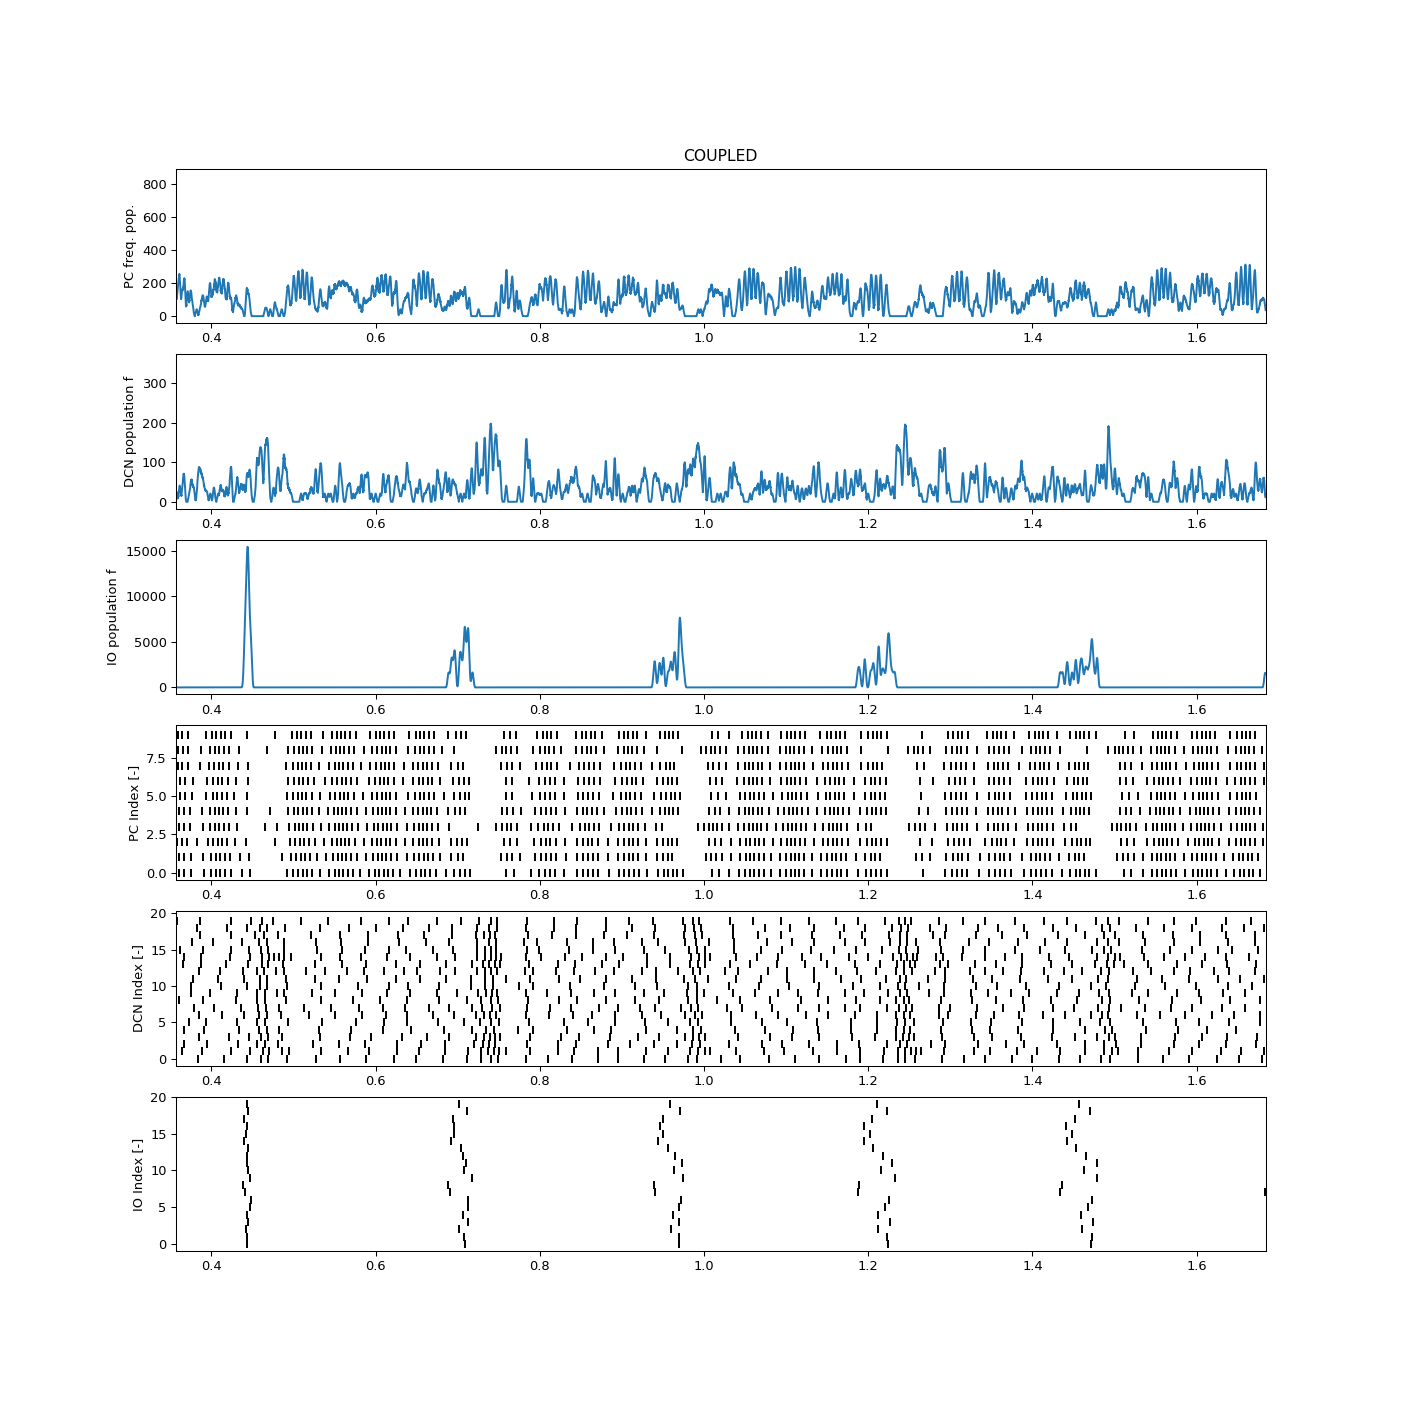

WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
 [py.warnings]


In [4]:
# figure 2 : COUPLED
%matplotlib notebook
f, a = plt.subplots(6, 1,figsize=(15,15))

# subplot 1: population frequency PC
ax1= plt.subplot(6,1,1)
plt.title('COUPLED')
plt.plot(t,Pop_Rate['PC_coupled'])
plt.ylabel('PC freq. pop.')
# subplot 2: population frequency DCN
ax2 = plt.subplot(612, sharex=ax1)
plt.plot(t,Pop_Rate['DCN_coupled'])
plt.ylabel('DCN population f')

# subplot 3: population frequency IO
ax3 = plt.subplot(613,sharex = ax1)
plt.plot(t,Pop_Rate['IO_coupled'])
plt.ylabel('IO population f')

# Raster plot PC
for i in range(0,nrPC):
    ax3 = plt.subplot(6,1,4, sharex=ax1)
    ax3.set_ylabel('PC Index [-]')
    neu = SpikeTimes_STDP['PC_coupled'][i]
    lensim = len(neu)
    yPC=np.ones((lensim,1))*i
    plt.scatter(x=neu,y=yPC,marker='|', color='black')

# Raster Plot DCN
for i in range(0,nrDCN):
    ax4 = plt.subplot(6,1,5, sharex=ax1)
    ax4.set_ylabel('DCN Index [-]')
    neu = SpikeTimes_STDP['DCN_coupled'][i]
    lensim = len(neu)
    yPC=np.ones((lensim,1))*i
    plt.scatter(x=neu,y=yPC,marker='|', color='black')

# Raster Plot IO
for i in range(0,nrIO):
    ax5 = plt.subplot(6,1,6, sharex=ax1)
    ax5.set_ylabel('IO Index [-]')
    neu = SpikeTimes_STDP['IO_coupled'][i]
    lensim = len(neu)
    yPC=np.ones((lensim,1))*i
    plt.scatter(x=neu,y=yPC,marker='|', color='black')

In [5]:
for p in range(0,nrPC):
    print('spike time coupled',len(SpikeTimes_STDP['PC_coupled'][p]))
    print('spike time uncoupled',len(SpikeTimes_STDP['PC_uncoupled'][p]))

spike time coupled 562
spike time uncoupled 574
spike time coupled 573
spike time uncoupled 579
spike time coupled 567
spike time uncoupled 574
spike time coupled 588
spike time uncoupled 599
spike time coupled 594
spike time uncoupled 602
spike time coupled 543
spike time uncoupled 547
spike time coupled 531
spike time uncoupled 536
spike time coupled 557
spike time uncoupled 564
spike time coupled 547
spike time uncoupled 556
spike time coupled 523
spike time uncoupled 533


<IPython.core.display.Javascript object>


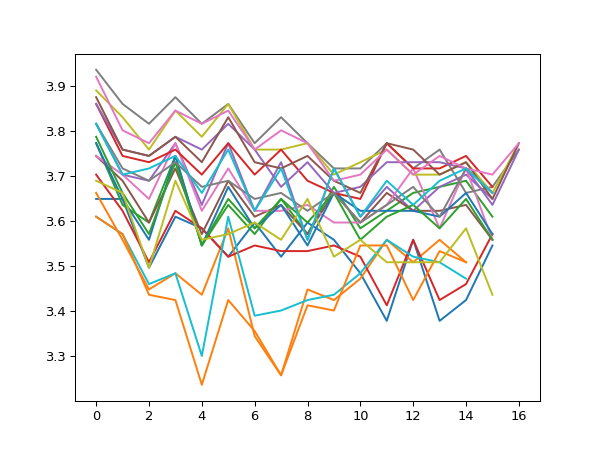

In [6]:
plt.figure()
for p in range(0,nrIO):
    freq=1/stat.isi(SpikeTimes_STDP['IO_uncoupled'][p])
    
    plt.plot(freq)
plt.show()